In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qclab.simulation as simulation
from qclab.models.holstein_lattice import HolsteinLatticeModel
from qclab.algorithms.mf import MeanFieldDynamics
from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray
from qclab.drivers.serial_driver import dynamics_serial

In [2]:
input_params = dict(num_states=10, temp = 1, j=1, g=0.5, w=0.2, m=1, open=False)
sim = HolsteinLatticeModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=0.01
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-25 10:46:45,737	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-25 10:46:55,653 E 717325 717347] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-25_10-46-44_134735_693382 is over 95% full, available space: 14574460928; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-25 10:47:05,685 E 717325 717347] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-25_10-46-44_134735_693382 is over 95% full, available space: 14574440448; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-25 10:47:15,732 E 717325 717347] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-25_10-46-44_134735_693382 is over 95% full, available space: 14574252032; capacity: 493949374464. Object creation will fail if spilling is required.
 33%|███▎      | 1/3 [00:33<01:06, 33.13s/it](raylet) [2024-07-25 10:47:25,788 E 717325 717347] (ray

In [3]:
eq = data_fssh.data_dic['e_q']
ec = data_fssh.data_dic['e_c']
print(eq+ec)

[1990.38998363 1990.38998234 1990.3899786  ... 1990.31501052 1990.31486224
 1990.31471809]


In [ ]:
input_params = dict(num_states=10, temp = 1, j=1, g=0.5, w=0.2, m=1, open=False)
sim = HolsteinLatticeModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=0.01
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_mf = dynamics_serial(MeanFieldDynamics, sim, seeds, simulation.Data())

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:06<00:00,  3.27it/s]


In [ ]:
input_params = dict(num_states=10, temp = 1, j=1, g=0.5, w=0.2, m=1, open=False)
sim = HolsteinLatticeModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=0.01
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_mf = dynamics_parallel_ray(MeanFieldDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-17 13:16:53,217	INFO worker.py:1771 -- Started a local Ray instance.
100%|██████████| 3/3 [00:07<00:00,  2.50s/it]


In [ ]:
input_params = dict(num_states=10, temp = 1, j=1, g=0.5, w=0.2, m=1, open=False)
sim = HolsteinLatticeModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=0.01
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-19 14:05:11,154	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s]


RayTaskError(TypingError): [36mray::dynamics_ray()[39m (pid=1534202, ip=10.105.232.36)
  File "/home/akrotz/Research/pyMQC/qclab/drivers/ray_driver.py", line 17, in dynamics_ray
    return dynamics.dynamics(algorithm, sim, traj)
  File "/home/akrotz/Research/pyMQC/qclab/dynamics.py", line 8, in dynamics
    dyn.initialize_dynamics(sim)
  File "/home/akrotz/Research/pyMQC/qclab/algorithms/fssh.py", line 101, in initialize_dynamics
    dab_q_phase, dab_p_phase = auxilliary.get_dab_phase(evals_0, evecs_0, z_coord_0, sim)
  File "/home/akrotz/Research/pyMQC/qclab/auxilliary.py", line 160, in get_dab_phase
    dkk_z, dkk_zc = get_dab(evec_i, evec_j, ev_diff + plus, z, sim)
  File "/home/akrotz/Research/pyMQC/qclab/auxilliary.py", line 136, in get_dab
    dab_z = sim.dh_qc_dz_branch(sim.h_qc_params, evec_a[np.newaxis,:], evec_b[np.newaxis,:], z[np.newaxis,:])[0] / ev_diff
  File "/home/akrotz/Research/pyMQC/qclab/models/holstein_lattice.py", line 49, in dh_qc_dz_branch
    out = auxilliary.matprod_sparse(dz_shape, dz_ind, dz_mels, psi_a_branch, psi_b_branch)
  File "/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/numba/core/dispatcher.py", line 423, in _compile_for_args
    error_rewrite(e, 'typing')
  File "/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/numba/core/dispatcher.py", line 364, in error_rewrite
    raise e.with_traceback(None)
numba.core.errors.TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function iadd>) found for signature:
 
 >>> iadd(complex128, array(complex128, 1d, C))
 
There are 18 candidate implementations:
[1m  - Of which 16 did not match due to:
  Overload of function 'iadd': File: <numerous>: Line N/A.
    With argument(s): '(complex128, array(complex128, 1d, C))':[0m
[1m   No match.[0m
[1m  - Of which 2 did not match due to:
  Operator Overload in function 'iadd': File: unknown: Line unknown.
    With argument(s): '(complex128, array(complex128, 1d, C))':[0m
[1m   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float64) -> float64
    * (complex64, complex64) -> complex64
    * (complex128, complex128) -> complex128[0m
[0m
[0m[1mDuring: typing of intrinsic-call at /home/akrotz/Research/pyMQC/qclab/auxilliary.py (237)[0m
[1m
File "../qclab/auxilliary.py", line 237:[0m
[1mdef matprod_sparse(shape, ind, mels, vec1, vec2):  # calculates <1|mat|2>
    <source elided>
    for i in range(len(i_ind)):
[1m        out_mat[i_ind[i]] += prod[i]
[0m        [1m^[0m[0m

2024-07-19 14:05:17,897	ERROR worker.py:409 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::dynamics_ray() (pid=1534198, ip=10.105.232.36)
  File "/home/akrotz/Research/pyMQC/qclab/drivers/ray_driver.py", line 17, in dynamics_ray
    return dynamics.dynamics(algorithm, sim, traj)
  File "/home/akrotz/Research/pyMQC/qclab/dynamics.py", line 8, in dynamics
    dyn.initialize_dynamics(sim)
  File "/home/akrotz/Research/pyMQC/qclab/algorithms/fssh.py", line 101, in initialize_dynamics
    dab_q_phase, dab_p_phase = auxilliary.get_dab_phase(evals_0, evecs_0, z_coord_0, sim)
  File "/home/akrotz/Research/pyMQC/qclab/auxilliary.py", line 160, in get_dab_phase
    dkk_z, dkk_zc = get_dab(evec_i, evec_j, ev_diff + plus, z, sim)
  File "/home/akrotz/Research/pyMQC/qclab/auxilliary.py", line 136, in get_dab
    dab_z = sim.dh_qc_dz_branch(sim.h_qc_params, evec_a[np.newaxis,:], evec_b[np.newaxis,:], z[np.newaxis,:])[0] / ev_diff
  File "/home/akrotz/Research/pyMQC/qclab/mo

In [ ]:
input_params = dict(num_states=10, temp = 1, j=1, g=0.5, w=0.2, m=1, open=False)
sim = HolsteinLatticeModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=0.01
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 18:20:09,337	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-15 18:20:19,249 E 1202132 1202154] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_18-20-07_631858_1195558 is over 95% full, available space: 18570629120; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 18:20:29,280 E 1202132 1202154] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_18-20-07_631858_1195558 is over 95% full, available space: 18570448896; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 18:20:39,311 E 1202132 1202154] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_18-20-07_631858_1195558 is over 95% full, available space: 18570248192; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 18:20:49,346 E 1202132 1202154] (raylet) file_system_monitor.cc:111: /

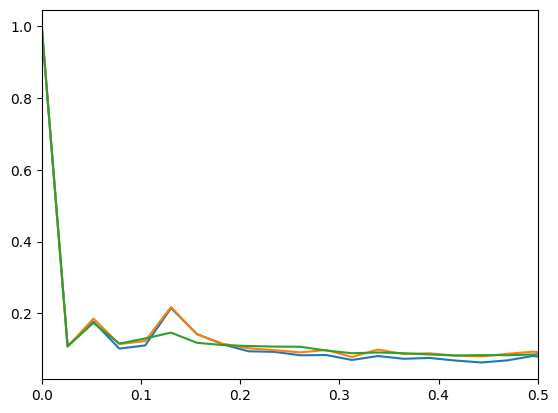

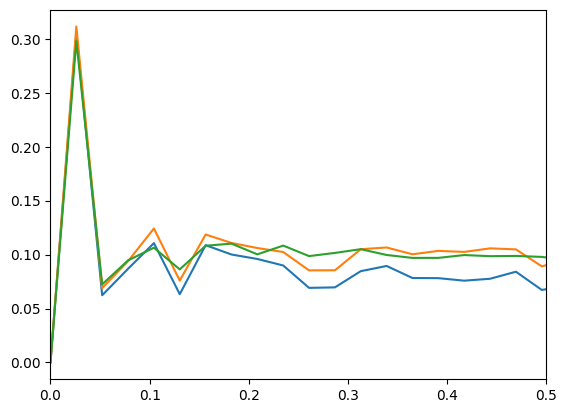

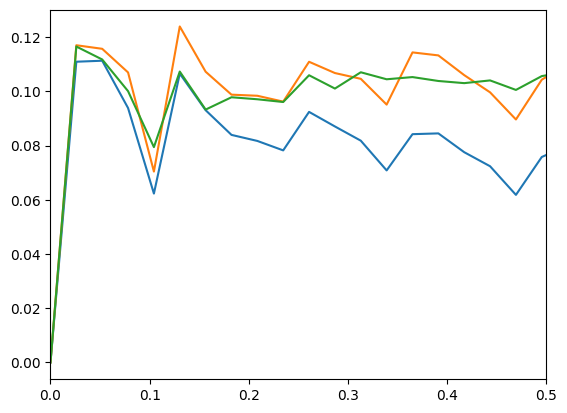

In [ ]:
pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))
t_ps = data_mf.data_dic['t']*0.0260677
ntraj = np.sum(pops_mf[0])
t_ps = t_ps/ntraj
pops_mf = pops_mf/ntraj


pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))
t_ps = data_fssh.data_dic['t']*0.0260677
ntraj = np.sum(pops_fssh[0])
t_ps = t_ps/ntraj
pops_fssh = pops_fssh/ntraj


pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['dm_db']))
t_ps = data_cfssh.data_dic['t']*0.0260677
t_ps = t_ps/ntraj
pops_cfssh = pops_cfssh/ntraj

plt.plot(t_ps,pops_mf[:,0])
plt.plot(t_ps,pops_fssh[:,0])
plt.plot(t_ps,pops_cfssh[:,0])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_mf[:,1])
plt.plot(t_ps,pops_fssh[:,1])
plt.plot(t_ps,pops_cfssh[:,1])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_mf[:,2])
plt.plot(t_ps,pops_fssh[:,2])
plt.plot(t_ps,pops_cfssh[:,2])
plt.xlim([0,0.5])
plt.show()